# zadanie 11

In [45]:
#install.packages("MASS")
library(MASS)
data("Pima.te")
pima <- Pima.te
pima$type<-ifelse(pima$type=="Yes",1,0) # zamiana zmiennej objaśnianej na 0, 1
head(pima)

npreg,glu,bp,skin,bmi,ped,age,type
6,148,72,35,33.6,0.627,50,1
1,85,66,29,26.6,0.351,31,0
1,89,66,23,28.1,0.167,21,0
3,78,50,32,31.0,0.248,26,1
2,197,70,45,30.5,0.158,53,1
5,166,72,19,25.8,0.587,51,1


### metoda QDA

#### model oparty o cross walidację

In [46]:
pima_qda_cv <- qda(type ~ npreg + glu + bp + skin + bmi + ped + age, data = pima, CV = TRUE)
summary(pima_qda_cv)

          Length Class  Mode   
class     332    factor numeric
posterior 664    -none- numeric
terms       3    terms  call   
call        4    -none- call   
xlevels     0    -none- list   

In [64]:
QDA_cv_actual <- pima$type
QDA_cv_predicted <- pima_qda_cv$class

QDA_confusion_matrix <- table(QDA_cv_actual, QDA_cv_predicted, dnn = c("Actual", "Predicted"))

QDA_cv_prediction_error <- mean(QDA_cv_actual != QDA_cv_predicted)

QDA_cv_confusion_matrix
QDA_cv_prediction_error

      Predicted
Actual   0   1
     0 191  32
     1  42  67

[1] 0.2228916

#### model oparty o metodę bootstrap

In [65]:
library(ipred)

mypredict.qda <- function(object, newdata)
  as.numeric(predict(object, newdata = newdata)$class)


QDA_boot_prediction_error <- errorest(type ~ ., data = pima, model = qda, estimator = 'boot', predict = mypredict.qda)

### metoda LDA

#### model oparty o cross walidację

In [66]:
pima_lda_cv <- lda(type ~ npreg + glu + bp + skin + bmi + ped + age, data = pima, CV = TRUE)
summary(pima_lda_cv)

          Length Class  Mode   
class     332    factor numeric
posterior 664    -none- numeric
terms       3    terms  call   
call        4    -none- call   
xlevels     0    -none- list   

In [67]:
LDA_cv_actual <- pima$type
LDA_cv_predicted <- pima_lda_cv$class

LDA_confusion_matrix <- table(LDA_cv_actual, LDA_cv_predicted, dnn = c("Actual", "Predicted"))

LDA_cv_prediction_error <- mean(LDA_cv_actual != LDA_cv_predicted)

LDA_cv_confusion_matrix
LDA_cv_prediction_error

      Predicted
Actual   0   1
     0 198  25
     1  47  62

[1] 0.2168675

#### model oparty o metodę bootstrap

In [68]:
library(ipred)

mypredict.lda <- function(object, newdata)
  as.numeric(predict(object, newdata = newdata)$class)


LDA_boot_prediction_error <- errorest(type ~ ., data = pima, model = lda, estimator = 'boot', predict = mypredict.lda)

### porównanie proporcji błędnych klasyfikacji dla modeli opartych o cross walidację

In [69]:
print("QDA-proporcja błędnych klasyfikacji")
QDA_cv_prediction_error
print("----------------------------------------------------------------------------------------------")
print("LDA-proporcja błędnych klasyfikacji")
LDA_cv_prediction_error

[1] "QDA-proporcja błędnych klasyfikacji"


[1] 0.2228916

[1] "----------------------------------------------------------------------------------------------"
[1] "LDA-proporcja błędnych klasyfikacji"


[1] 0.2168675

### porównaie błędów dla modeli opartych o metodę bootstrap

In [70]:
print("QDA-proporcja błędnych klasyfikacji")
QDA_boot_prediction_error
print("------------------------------------------------------------------------------------------------------------")
print("LDA-proporcja błędnych klasyfikacji")
LDA_boot_prediction_error

[1] "QDA-proporcja błędnych klasyfikacji"



Call:
errorest.data.frame(formula = type ~ ., data = pima, model = qda, 
    predict = mypredict.qda, estimator = "boot")

	 Bootstrap estimator of root mean squared error 
	 with 25 bootstrap replications

Root mean squared error:  1.0808 


[1] "------------------------------------------------------------------------------------------------------------"
[1] "LDA-proporcja błędnych klasyfikacji"



Call:
errorest.data.frame(formula = type ~ ., data = pima, model = lda, 
    predict = mypredict.lda, estimator = "boot")

	 Bootstrap estimator of root mean squared error 
	 with 25 bootstrap replications

Root mean squared error:  1.0396 


### porównanie specyficzności i czułości modeli LDA i QDA

In [73]:


LDA_TN <- LDA_confusion_matrix[1]
LDA_FN <- LDA_confusion_matrix[2]
LDA_FP <- LDA_confusion_matrix[3]
LDA_TP <- LDA_confusion_matrix[4]

LDA_sensitivity <- LDA_TP/(LDA_TP + LDA_FN)

LDA_specificity <- LDA_TN/(LDA_TN + LDA_FP)

In [72]:
#QDA_confusion_matrix

QDA_TN <- QDA_confusion_matrix[1]
QDA_FN <- QDA_confusion_matrix[2]
QDA_FP <- QDA_confusion_matrix[3]
QDA_TP <- QDA_confusion_matrix[4]

QDA_sensitivity <- QDA_TP/(QDA_TP + QDA_FN)

QDA_specificity <- QDA_TN/(QDA_TN + QDA_FP)

In [74]:
print("Czułość LDA")
LDA_sensitivity
print("Czułość QDA")
QDA_sensitivity
print("Specyficzność LDA")
LDA_specificity
print("Specyficzność LDA")
QDA_specificity

[1] "Czułość LDA"


[1] 0.5688073

[1] "Czułość QDA"


[1] 0.6146789

[1] "Specyficzność LDA"


[1] 0.8878924

[1] "Specyficzność LDA"


[1] 0.8565022

### porównanie krzywych ROC

#### train test split

In [75]:
center <- floor(nrow(pima)/2)
pima_test <- pima[1:center,]
pima_train <- pima[center:nrow(pima),]

#### model LDA

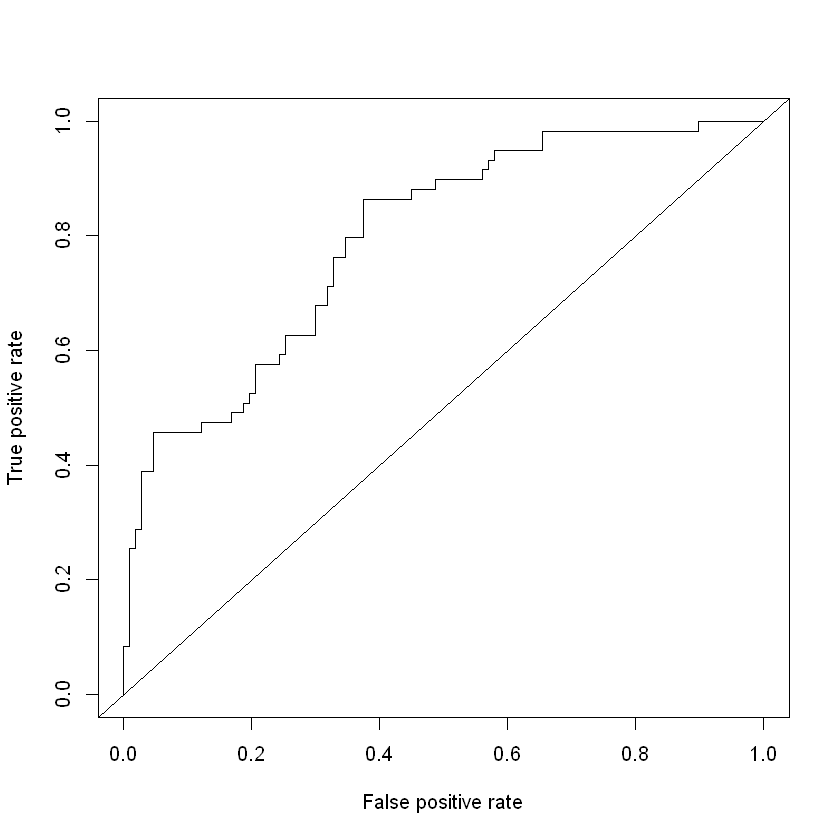

In [76]:
model_LDA <- lda(type ~ npreg + glu + bp + skin + bmi + ped + age, data = pima_train)

LDA_pred <- predict(model_LDA, newdata = pima_test)

LDA_pred_posteriori <- as.data.frame(LDA_pred$posterior)

LDA_pred <- prediction(LDA_pred_posteriori[,2], pima_test$type)

LDA_roc.perf = performance(LDA_pred, measure = "tpr", x.measure = "fpr")

plot(LDA_roc.perf)
abline(a=0, b= 1)

#### model QDA

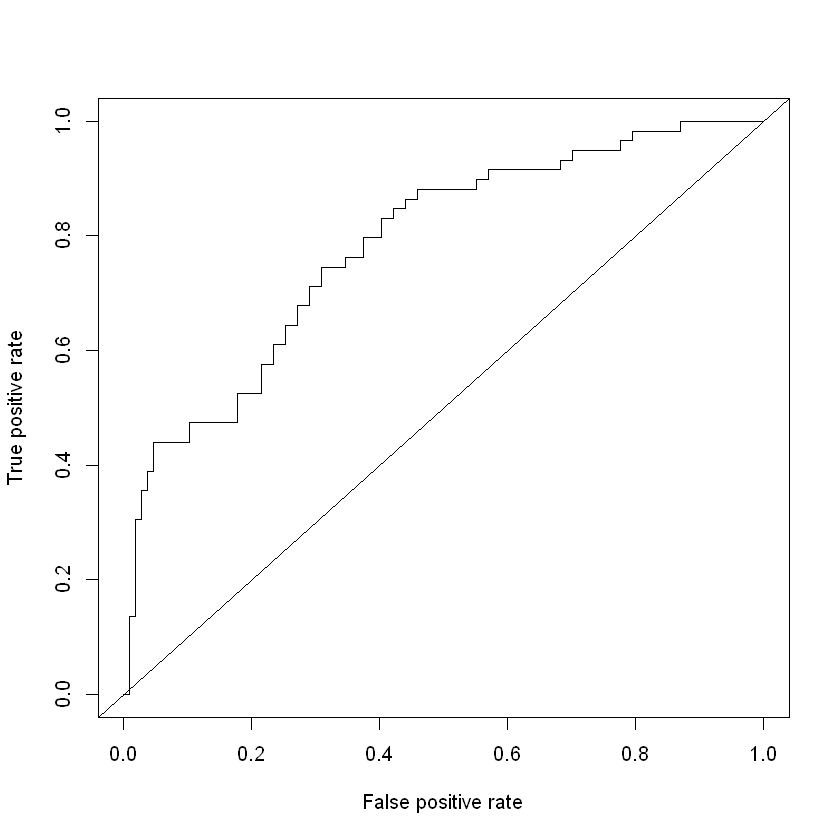

In [77]:
model_QDA <- qda(type ~ npreg + glu + bp + skin + bmi + ped + age, data = pima_train)

QDA_pred <- predict(model_QDA, newdata = pima_test)

QDA_pred_posteriori <- as.data.frame(QDA_pred$posterior)

QDA_pred <- prediction(QDA_pred_posteriori[,2], pima_test$type)

QDA_roc.perf = performance(QDA_pred, measure = "tpr", x.measure = "fpr")

plot(QDA_roc.perf)
abline(a=0, b= 1)

Jak widać na podstawie błędu predykcji oraz czułości i specyficzności, dla wybranych danych, model LDA jest lepszym klasyfikatorem.